In [ ]:
#from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras import backend as K
import tensorflow as tf

#using tensor flow 2.x
tf.random.set_seed(30)
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.python.keras import optimizers, losses, activations, models
from tensorflow.python.keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from tensorflow.python.keras import applications

import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import datetime
import pandas as pd
import random as rn

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

rn.seed(30)
tf.__version__

'2.4.1'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Copy the uploaded zip file in google drive to colab session for faster processing.
!cp -r '/content/drive/My Drive/notebooks/images/fundus/Disease Grading.zip' '/'
!cp -r '/content/drive/My Drive/notebooks/images/fundus/hed_pretrained_bsds.caffemodel' '/'
!cp -r '/content/drive/My Drive/notebooks/images/fundus/deploy.prototxt' '/'
#Unzip the data in  colab session for faster processing.
!unzip '/Disease Grading.zip' -d '/'

Archive:  /Disease Grading.zip
   creating: /B. Disease Grading/
   creating: /B. Disease Grading/1. Original Images/
   creating: /B. Disease Grading/1. Original Images/a. Training Set/
 extracting: /B. Disease Grading/1. Original Images/a. Training Set/IDRiD_001.jpg  
 extracting: /B. Disease Grading/1. Original Images/a. Training Set/IDRiD_002.jpg  
 extracting: /B. Disease Grading/1. Original Images/a. Training Set/IDRiD_003.jpg  
 extracting: /B. Disease Grading/1. Original Images/a. Training Set/IDRiD_004.jpg  
 extracting: /B. Disease Grading/1. Original Images/a. Training Set/IDRiD_005.jpg  
 extracting: /B. Disease Grading/1. Original Images/a. Training Set/IDRiD_006.jpg  
 extracting: /B. Disease Grading/1. Original Images/a. Training Set/IDRiD_007.jpg  
 extracting: /B. Disease Grading/1. Original Images/a. Training Set/IDRiD_008.jpg  
 extracting: /B. Disease Grading/1. Original Images/a. Training Set/IDRiD_009.jpg  
 extracting: /B. Disease Grading/1. Original Images/a. Tr

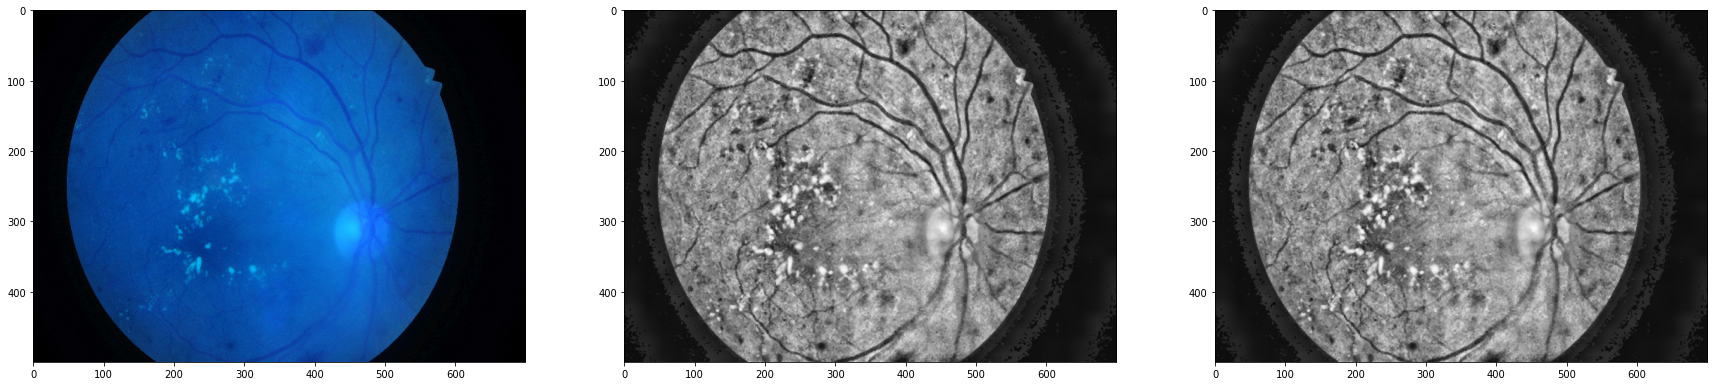

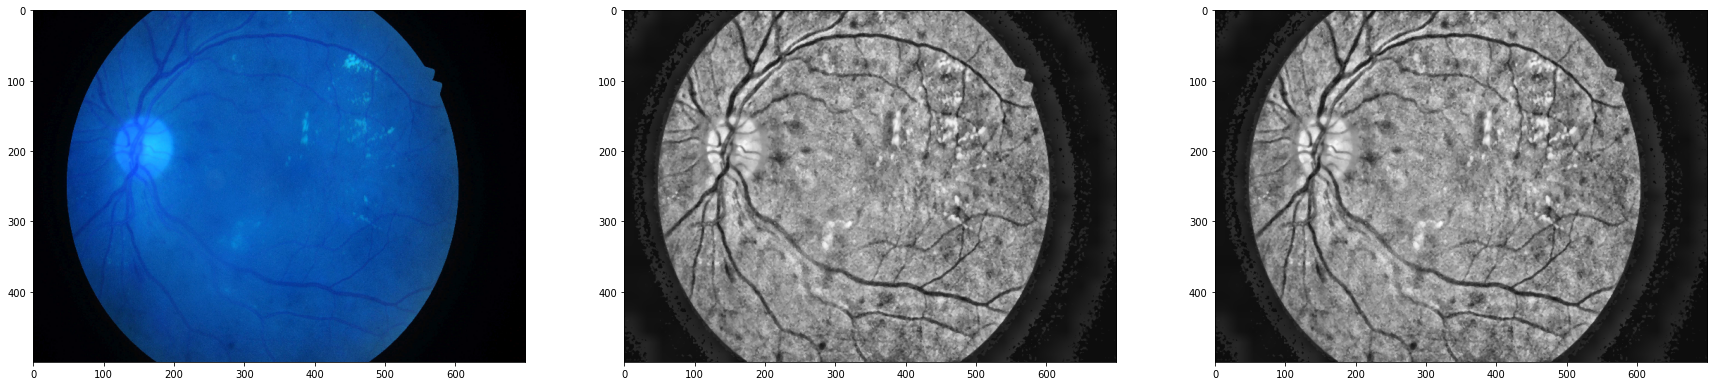

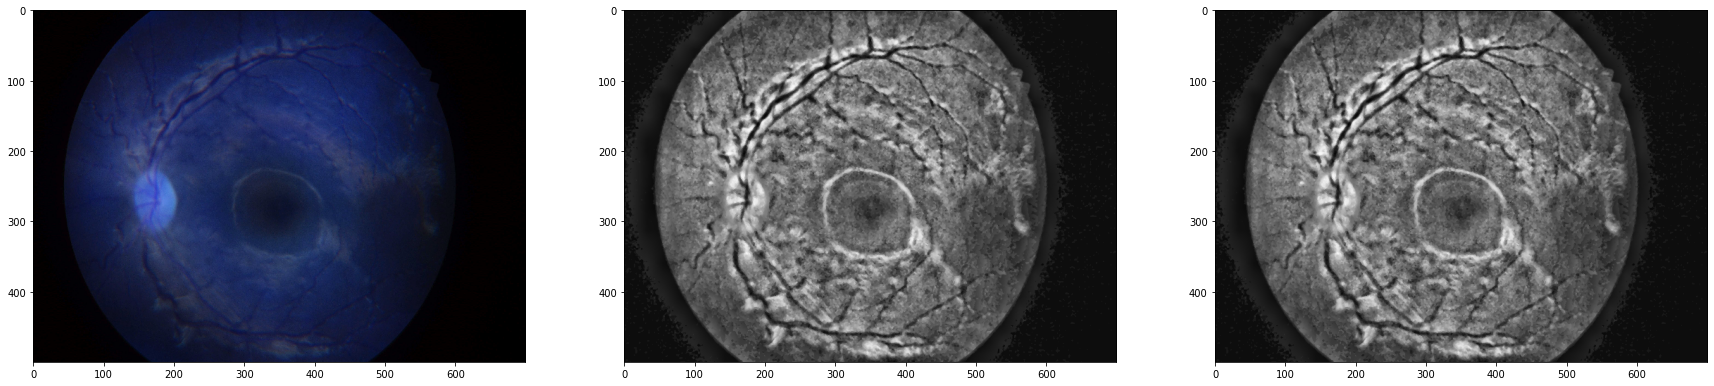

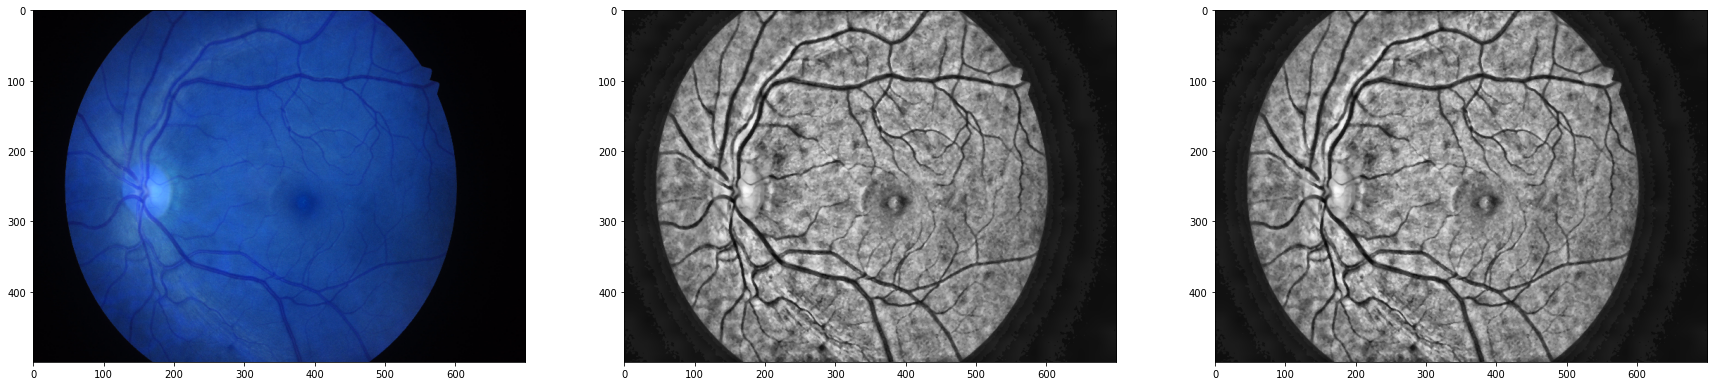

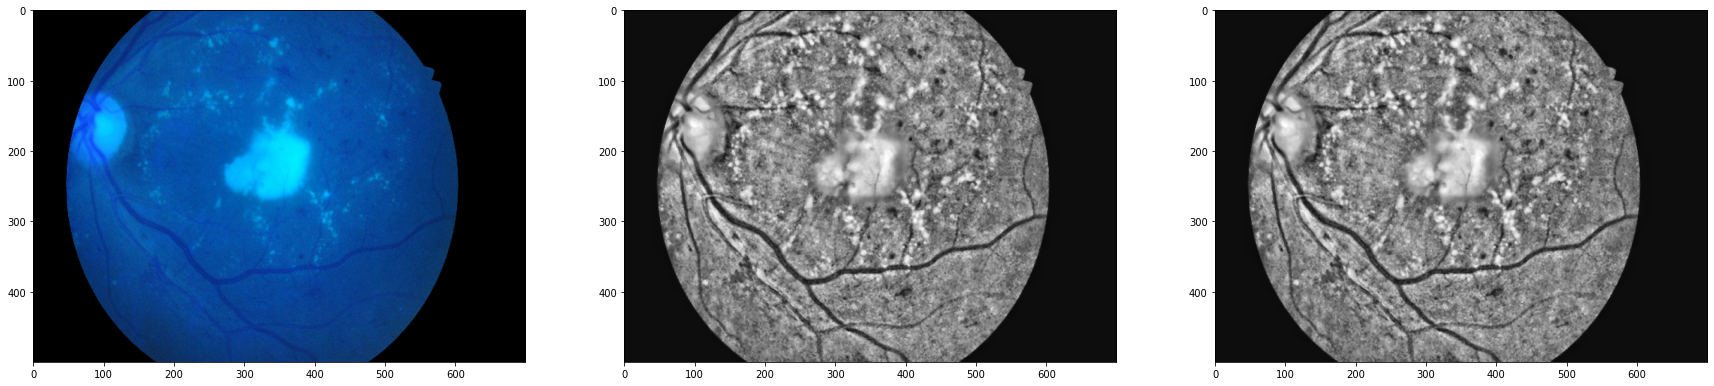

In [ ]:
def displayfundus(image,image1,image2):

  f = plt.figure(figsize=(30,30))
  ax = f.add_subplot(1,3,1)
  plt.imshow(image)
  
  ax2 = f.add_subplot(1,3,2)
  plt.imshow(image1)


  ax3 = f.add_subplot(1,3,3)
  plt.imshow(image2)

  plt.show()  

fundus_original_image = [
                          '/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_001.jpg',  
                         '/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_002.jpg',
                         '/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_147.jpg',
                         '/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_156.jpg',
                         '/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_224.jpg'
]
clahe = cv2.createCLAHE(clipLimit=12.0, tileGridSize=(32,32))
for i in range(len(fundus_original_image)):
  org_image = cv2.imread(fundus_original_image[i])  
  org_image = cv2.resize(org_image, (700,500), interpolation=cv2.INTER_NEAREST)
  org_image_gray = cv2.cvtColor(org_image, cv2.COLOR_BGR2GRAY)
  final_image = clahe.apply(org_image_gray)
  final_image = cv2.medianBlur(final_image,3)                
  final_image = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)    

  displayfundus(org_image,final_image,final_image)  

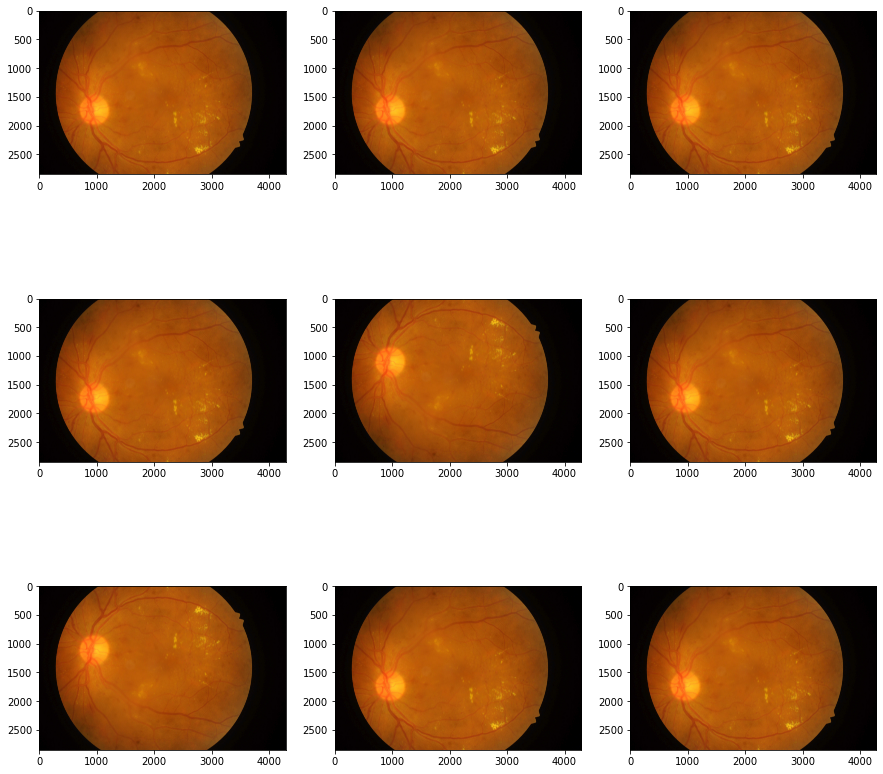

In [ ]:
# example of random rotation image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image

fundus_original_image = [
                          '/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_001.jpg',  
                         '/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_002.jpg',
                         '/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_147.jpg',
                         '/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_156.jpg',
                         '/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_224.jpg'
]

img = load_img(fundus_original_image[1])
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(vertical_flip=True,)
# prepare iterator
it = datagen.flow(samples, batch_size=1)

pyplot.figure(figsize=(15,15))
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [ ]:
# example of random rotation image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image

fundus_original_image = [
                          '/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_001.jpg',  
                         '/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_002.jpg',
                         '/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_147.jpg',
                         '/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_156.jpg',
                         '/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_224.jpg'
]

img = load_img(fundus_original_image[1])
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample

clahe32 = cv2.createCLAHE(clipLimit=12.0, tileGridSize=(32,32))
clahe16 = cv2.createCLAHE(clipLimit=12.0, tileGridSize=(16,16))
clahe8 = cv2.createCLAHE(clipLimit=12.0, tileGridSize=(8,8))
clahe4 = cv2.createCLAHE(clipLimit=12.0, tileGridSize=(4,4))
clahe2 = cv2.createCLAHE(clipLimit=12.0, tileGridSize=(2,2))

pyplot.figure(figsize=(30,30))
# generate samples and plot
org_image_gray = cv2.cvtColor(org_image, cv2.COLOR_BGR2GRAY)
# define subplot

pyplot.subplot(151)
#final_image = clahe2.apply(org_image)
#org_image = org_image.astype('uint8')
pyplot.imshow(cv2.cvtColor(org_image, cv2.COLOR_BGR2RGB))

pyplot.subplot(152)
final_image = clahe32.apply(org_image_gray)
final_image = final_image.astype('uint8')
pyplot.imshow(final_image,cmap='binary_r')

pyplot.subplot(153)
final_image = clahe16.apply(org_image_gray)
final_image = final_image.astype('uint8')
pyplot.imshow(final_image,cmap='binary_r')

pyplot.subplot(154)
final_image = clahe8.apply(org_image_gray)
final_image = final_image.astype('uint8')
pyplot.imshow(final_image,cmap='binary_r')

pyplot.subplot(155)
final_image = clahe4.apply(org_image_gray)
final_image = final_image.astype('uint8')
pyplot.imshow(final_image,cmap='binary_r')



# plot raw pixel data

# show the figure
pyplot.show()

NameError: ignored

<Figure size 2160x2160 with 0 Axes>

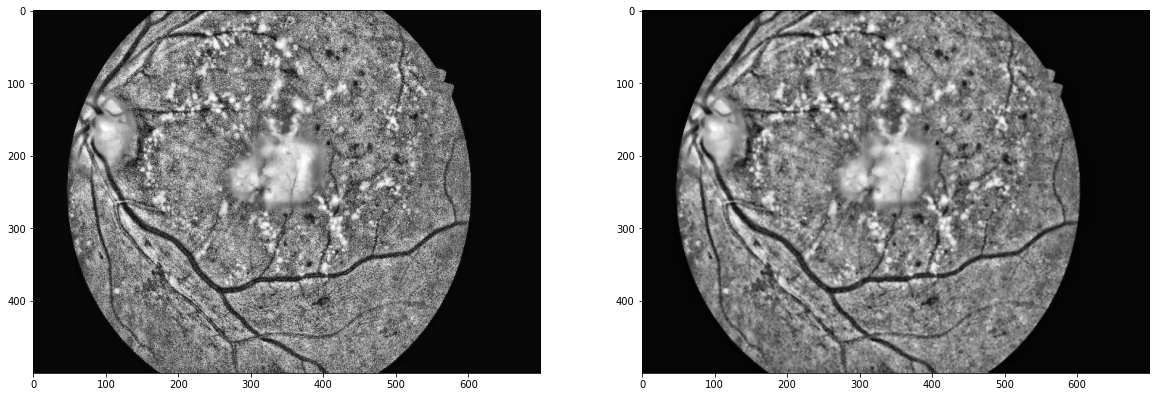

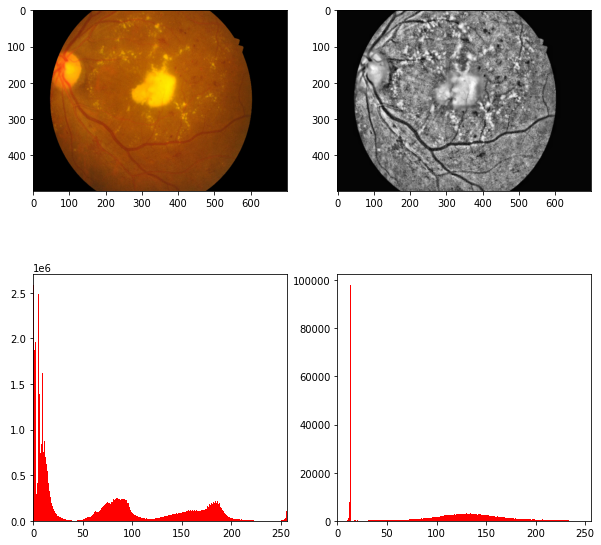

Data Type: uint8
Min: 0.000, Max: 255.000
Data Type: float64
Min: 0.031, Max: 1.000


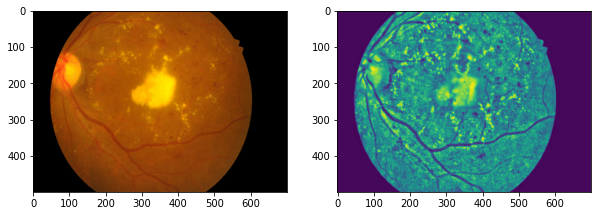

In [ ]:
# example of random rotation image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image

fundus_original_image = [
                          '/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_001.jpg',  
                         '/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_002.jpg',
                         '/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_147.jpg',
                         '/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_156.jpg',
                         '/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_224.jpg'
]

img = load_img(fundus_original_image[1])
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample

clahe32 = cv2.createCLAHE(clipLimit=12.0, tileGridSize=(32,32))
clahe16 = cv2.createCLAHE(clipLimit=12.0, tileGridSize=(16,16))
clahe8 = cv2.createCLAHE(clipLimit=12.0, tileGridSize=(8,8))
clahe4 = cv2.createCLAHE(clipLimit=12.0, tileGridSize=(4,4))
clahe2 = cv2.createCLAHE(clipLimit=12.0, tileGridSize=(2,2))

pyplot.figure(figsize=(20,20))
# generate samples and plot
org_image_gray = cv2.cvtColor(org_image, cv2.COLOR_BGR2GRAY)
# define subplot



pyplot.subplot(121)
final_image = clahe32.apply(org_image_gray)
final_image = final_image.astype('uint8')
pyplot.imshow(final_image,cmap='binary_r')

pyplot.subplot(122)
final_image = clahe32.apply(org_image_gray)
final_image = cv2.medianBlur(final_image,3)  
final_image = final_image.astype('uint8')
pyplot.imshow(final_image,cmap='binary_r')

# plot raw pixel data

# show the figure
pyplot.show()



pyplot.figure(figsize=(10,10))

pyplot.subplot(221)
#final_image = clahe2.apply(org_image)
#org_image = org_image.astype('uint8')
pyplot.imshow(cv2.cvtColor(org_image, cv2.COLOR_BGR2RGB))

pyplot.subplot(222)
final_image = clahe32.apply(org_image_gray)
final_image = cv2.medianBlur(final_image,3)  
final_image = final_image.astype('uint8')
pyplot.imshow(final_image,cmap='binary_r')

pyplot.subplot(223)
hist,bins = np.histogram(data.flatten(),256,[0,256])
plt.hist(data.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])


pyplot.subplot(224)
hist,bins = np.histogram(final_image.flatten(),256,[0,256])
plt.hist(final_image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])

plt.show()

print('Data Type: %s' % org_image.dtype)
print('Min: %.3f, Max: %.3f' % (org_image.min(), org_image.max()))
pyplot.figure(figsize=(10,10))

pyplot.subplot(121)
#final_image = clahe2.apply(org_image)
#org_image = org_image.astype('uint8')
pyplot.imshow(cv2.cvtColor(org_image, cv2.COLOR_BGR2RGB))

pyplot.subplot(122)
final_image = clahe32.apply(org_image_gray)
final_image = cv2.medianBlur(final_image,3)  
final_image = final_image/255.0
#final_image = final_image.astype('uint8')
pyplot.imshow(final_image)



# confirm pixel range is 0-255

print('Data Type: %s' % final_image.dtype)
print('Min: %.3f, Max: %.3f' % (final_image.min(), final_image.max()))

In [ ]:
class CropLayer(object):
    def __init__(self, params, blobs):
        self.xstart = 0
        self.xend = 0
        self.ystart = 0
        self.yend = 0

    # Our layer receives two inputs. We need to crop the first input blob
    # to match a shape of the second one (keeping batch size and number of channels)
    def getMemoryShapes(self, inputs):
        inputShape, targetShape = inputs[0], inputs[1]
        batchSize, numChannels = inputShape[0], inputShape[1]
        height, width = targetShape[2], targetShape[3]

        self.ystart = (inputShape[2] - targetShape[2]) // 2
        self.xstart = (inputShape[3] - targetShape[3]) // 2
        self.yend = self.ystart + height
        self.xend = self.xstart + width

        return [[batchSize, numChannels, height, width]]

    def forward(self, inputs):
        return [inputs[0][:,:,self.ystart:self.yend,self.xstart:self.xend]]

cv2.dnn_registerLayer('Crop', CropLayer) 
net = cv2.dnn.readNetFromCaffe("/deploy.prototxt", "/hed_pretrained_bsds.caffemodel")   

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot
fundus_original_image = [
                          '/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_001.jpg',  
                         '/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_002.jpg',
                         '/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_147.jpg',
                         '/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_156.jpg',
                         '/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_224.jpg'
]

img = load_img(fundus_original_image[1])
# convert to numpy array
img = img_to_array(img)
img = (img).astype(np.uint8)
org_image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
final_image = clahe32.apply(org_image_gray)
final_image = cv2.medianBlur(final_image,3) 
final_image = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB) 
blob = cv2.dnn.blobFromImage(final_image, scalefactor=0.5, size=(700, 700),
        mean=(110, 54 , 9),
        swapRB=True, crop=False)
# set the blob as the input to the network and perform a forward pass
# to compute the edges
net.setInput(blob)
hed = net.forward()
hed = cv2.resize(hed[0, 0], (700, 700))
#hed = cv2.cvtColor(hed, cv2.COLOR_BGR2RGB)
hed = (127 * hed).astype("uint8")
pyplot.figure(figsize=(10,10))
plt.imshow(hed,cmap="binary_r")   
plt.show()

In [ ]:
df_train = pd.read_csv('/B. Disease Grading/2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv',usecols=['Image name',	'Retinopathy grade',	'Risk of macular edema '])
df_train['dr'] = [1 if x > 0 else 0 for x in df_train['Retinopathy grade']] 

no_dr = df_train.loc[df_train['dr'] == 0].to_numpy()
yes_dr = df_train.loc[df_train['dr'] == 1].to_numpy()

train_source_path = '/B. Disease Grading/1. Original Images/a. Training Set/'
test_source_path = '/B. Disease Grading/1. Original Images/b. Testing Set/'

image_path = train_source_path+ no_dr[0][0]+".jpg"             
print("reading train :: ",image_path)  
org_image =  cv2.imread(image_path) # read all the images in the folder



reading train ::  /B. Disease Grading/1. Original Images/a. Training Set/IDRiD_118.jpg


In [ ]:
df_train.groupby('dr').count()

Image name  Retinopathy grade  Risk of macular edema 
dr                                                       
0          134                134                     134
1          279                279                     279

In [ ]:
y = 500  # height of the image
z = 700  # Width of the image
clahe = cv2.createCLAHE(clipLimit=12.0, tileGridSize=(32,32))

horizontal_datagen = ImageDataGenerator(horizontal_flip=True)

def load_train_dataset(source_path,image_data):

  ls = len(image_data)

  train_img,train_label = list(),list()

  for index in range(ls):
    
    image_path = source_path+image_data[index][0]+".jpg"
    label = image_data[index][3]
    img = cv2.imread(image_path)
    img = cv2.resize(img, (z,y), interpolation=cv2.INTER_LINEAR)

    train_img.append(img)  
    train_label.append(label)
    # convert to numpy array
    
    if label == 0:
      data = img_to_array(img)
      # expand dimension to one sample
      samples = expand_dims(data, 0)
      # create image data augmentation generator

      it = horizontal_datagen.flow(samples, batch_size=1)
      batch = it.next()
        
      # convert to unsigned integers for viewing
      image = batch[0].astype('uint8')
      train_img.append(image)  
      train_label.append(label)
  
  temp = list(zip(train_img, train_label)) 
  rn.shuffle(temp) 
  train_img, train_label = zip(*temp)      
  
  return train_img,train_label

def load_test_dataset(source_path,image_data):

  ls = len(image_data)

  test_img,test_label = list(),list()

  for index in range(ls):
    
    image_path = source_path+image_data[index][0]+".jpg"
    label = image_data[index][3]

    img = cv2.imread(image_path)
    img = cv2.resize(img, (z,y), interpolation=cv2.INTER_LINEAR)
    test_img.append(img)  
    test_label.append(label)   
  
  temp = list(zip(test_img, test_label)) 
  rn.shuffle(temp) 
  test_img, test_label = zip(*temp)
  
  return test_img,test_label

#batch  generator
def generator(source_path, batch_size,image_data,label_data):
    #print( 'Source path = ', source_path, '; batch size =', batch_size)

    ls = len(image_data)

    t = image_data
    num_batches = ls // batch_size;
    while True:        
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,1)) # batch_labels is the one hot representation of the output
            
            for index in range(batch_size): # iterate over the batch_size
                               
                #image_path = source_path+t[(batch_size*batch) + index][0]+".jpg"             
                #print("reading train :: ",image_path)  
                #org_image =  cv2.imread(image_path) # read all the images in the folder
                
                org_image = image_data[(batch_size*batch) + index]
                #org_image = cv2.resize(org_image, (z,y), interpolation=cv2.INTER_LINEAR)

                h, w, c = org_image.shape
                if (h < y) or (w < z):
                  print(org_image.shape)
                org_image_gray = cv2.cvtColor(org_image, cv2.COLOR_BGR2GRAY)
                final_image = clahe.apply(org_image_gray)
                final_image = cv2.medianBlur(final_image,3)                    
                final_image = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)    

                final_image = (final_image / 127.5) - 1.0 

                batch_data[index,:,:,0] = final_image[:,:,0]
                batch_data[index,:,:,1] = final_image[:,:,1]
                batch_data[index,:,:,2] = final_image[:,:,2]

                
                batch_labels[index, 0] = label_data[(batch_size*batch) + index]
                
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

        #Check if there are any remaining folders to be processed
        if len(t) % batch_size != 0 : 
            start = (batch_size*num_batches)
            end = len(t)
            batch_data = np.zeros((end-start,y,z,3))
            batch_labels = np.zeros((end-start,1))
            for index,id in enumerate(range(start , end)): # iterate over the batch_size
                
                
                #image_path =  source_path+imahe_data[id][0]+".jpg"    
                   
                #org_image =  cv2.imread(image_path) # read all the images in the folder

                org_image = image_data[id]
                #org_image = cv2.resize(org_image, (z,y), interpolation=cv2.INTER_LINEAR)

                h, w, c = org_image.shape
                if (h < y) or (w < z):
                  print(org_image.shape)
                org_image_gray = cv2.cvtColor(org_image, cv2.COLOR_BGR2GRAY)
                final_image = clahe.apply(org_image_gray)
                final_image = cv2.medianBlur(final_image,3)                    
                final_image = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)      
                
                final_image = (final_image / 127.5) - 1.0 

                batch_data[index,:,:,0] = final_image[:,:,0]
                batch_data[index,:,:,1] = final_image[:,:,1]
                batch_data[index,:,:,2] = final_image[:,:,2]

                batch_labels[index, 0] = label_data[id]      

            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do      

In [ ]:
train_source_path = '/B. Disease Grading/1. Original Images/a. Training Set/'
test_source_path = '/B. Disease Grading/1. Original Images/b. Testing Set/'

df_train = pd.read_csv('/B. Disease Grading/2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv',usecols=['Image name',	'Retinopathy grade',	'Risk of macular edema '])
df_train['dr'] = [1 if x > 0 else 0 for x in df_train['Retinopathy grade']] 

df_test = pd.read_csv('/B. Disease Grading/2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv',usecols=['Image name',	'Retinopathy grade',	'Risk of macular edema '])
df_test['dr'] = [1 if x > 0 else 0 for x in df_test['Retinopathy grade']] 



train_img,train_l = load_train_dataset(train_source_path,df_train.to_numpy())

test_img, test_l = load_test_dataset(test_source_path,df_test.to_numpy())

547
103


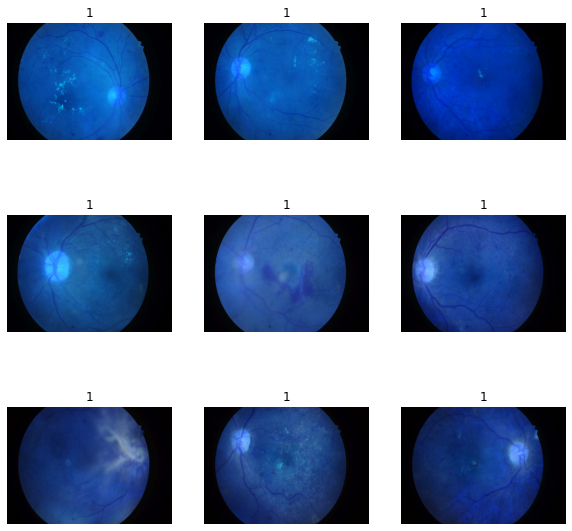

In [ ]:
print(len(train_img))
print(len(test_img))

import numpy as np
   
plt.figure(figsize=(10, 10))

for i in range(9):
    first_image = train_img[i]
    img = first_image
    ax = plt.subplot(3, 3, i + 1)
    #augmented_image = data_augmentation(
    #    tf.expand_dims(first_image, 0), training=True
    #)
    plt.imshow(first_image)
    plt.title(int(train_l[i]))
    plt.axis("off")

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.python.keras import layers
from tensorflow.python.keras.layers import Activation
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Reshape, multiply, Permute, Concatenate, Conv2D, Add,Lambda
from tensorflow.python.keras.layers import Input
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import AveragePooling2D
from tensorflow.python.keras.layers import GlobalAveragePooling2D
from tensorflow.python.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.utils import get_source_inputs
from tensorflow.python.keras.utils.data_utils import get_file
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.applications.imagenet_utils import decode_predictions
from tensorflow.python.keras.applications import inception_v3
def _conv2d_bn(x,
               filters,
               num_row,
               num_col,
               padding='same',
               strides=(1, 1),
               name=None):
    """Utility function to apply conv + BN.
    # Arguments
        x: input tensor.
        filters: filters in `Conv2D`.
        num_row: height of the convolution kernel.
        num_col: width of the convolution kernel.
        padding: padding mode in `Conv2D`.
        strides: strides in `Conv2D`.
        name: name of the ops; will become `name + '_conv'`
            for the convolution and `name + '_bn'` for the
            batch norm layer.
    # Returns
        Output tensor after applying `Conv2D` and `BatchNormalization`.
    """
    if name is not None:
        bn_name = name + '_bn'
        conv_name = name + '_conv'
    else:
        bn_name = None
        conv_name = None
    if K.image_data_format() == 'channels_first':
        bn_axis = 1
    else:
        bn_axis = 3
    x = Conv2D(
        filters, (num_row, num_col),
        strides=strides,
        padding=padding,
        use_bias=False,
        name=conv_name)(x)
    x = BatchNormalization(axis=bn_axis, scale=False, name=bn_name)(x)
    x = Activation('relu', name=name)(x)
    return x

def Inception_V3_(include_top=True,
                  weights=None,
                  input_tensor=None,
                  input_shape=None,
                  pooling=None,
                  classes=1000,
                  attention_module=None):
    """Instantiates the Squeeze and Excite Inception v3 architecture.
    # Arguments
        include_top: whether to include the fully-connected
            layer at the top of the network.
        weights: one of `None` (random initialization)
            or "imagenet" (pre-training on ImageNet).
        input_tensor: optional Keras tensor (i.e. output of `layers.Input()`)
            to use as image input for the model.
        input_shape: optional shape tuple, only to be specified
            if `include_top` is False (otherwise the input shape
            has to be `(299, 299, 3)` (with `channels_last` data format)
            or `(3, 299, 299)` (with `channels_first` data format).
            It should have exactly 3 inputs channels,
            and width and height should be no smaller than 139.
            E.g. `(150, 150, 3)` would be one valid value.
        pooling: Optional pooling mode for feature extraction
            when `include_top` is `False`.
            - `None` means that the output of the model will be
                the 4D tensor output of the
                last convolutional layer.
            - `avg` means that global average pooling
                will be applied to the output of the
                last convolutional layer, and thus
                the output of the model will be a 2D tensor.
            - `max` means that global max pooling will
                be applied.
        classes: optional number of classes to classify images
            into, only to be specified if `include_top` is True, and
            if no `weights` argument is specified.
    # Returns
        A Keras model instance.
    # Raises
        ValueError: in case of invalid argument for `weights`,
            or invalid input shape.
    """
  

  

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = 3

    x = _conv2d_bn(img_input, 32, 3, 3, strides=(2, 2), padding='valid')
    x = _conv2d_bn(x, 32, 3, 3, padding='valid')
    x = _conv2d_bn(x, 64, 3, 3)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = _conv2d_bn(x, 80, 1, 1, padding='valid')
    x = _conv2d_bn(x, 192, 3, 3, padding='valid')
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    # mixed 0, 1, 2: 35 x 35 x 256
    branch1x1 = _conv2d_bn(x, 64, 1, 1)

    branch5x5 = _conv2d_bn(x, 48, 1, 1)
    branch5x5 = _conv2d_bn(branch5x5, 64, 5, 5)

    branch3x3dbl = _conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = _conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = _conv2d_bn(branch3x3dbl, 96, 3, 3)

    branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = _conv2d_bn(branch_pool, 32, 1, 1)
    x = layers.concatenate(
        [branch1x1, branch5x5, branch3x3dbl, branch_pool],
        axis=channel_axis,
        name='mixed0')

    # attention_module
    if attention_module is not None:
        x = attach_attention_module(x, attention_module)

    # mixed 1: 35 x 35 x 256
    branch1x1 = _conv2d_bn(x, 64, 1, 1)

    branch5x5 = _conv2d_bn(x, 48, 1, 1)
    branch5x5 = _conv2d_bn(branch5x5, 64, 5, 5)

    branch3x3dbl = _conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = _conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = _conv2d_bn(branch3x3dbl, 96, 3, 3)

    branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = _conv2d_bn(branch_pool, 64, 1, 1)
    x = layers.concatenate(
        [branch1x1, branch5x5, branch3x3dbl, branch_pool],
        axis=channel_axis,
        name='mixed1')

    # attention_module
    if attention_module is not None:
        x = attach_attention_module(x, attention_module)

    # mixed 2: 35 x 35 x 256
    branch1x1 = _conv2d_bn(x, 64, 1, 1)

    branch5x5 = _conv2d_bn(x, 48, 1, 1)
    branch5x5 = _conv2d_bn(branch5x5, 64, 5, 5)

    branch3x3dbl = _conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = _conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = _conv2d_bn(branch3x3dbl, 96, 3, 3)

    branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = _conv2d_bn(branch_pool, 64, 1, 1)
    x = layers.concatenate(
        [branch1x1, branch5x5, branch3x3dbl, branch_pool],
        axis=channel_axis,
        name='mixed2')

    # attention_module
    if attention_module is not None:
        x = attach_attention_module(x, attention_module)

    # mixed 3: 17 x 17 x 768
    branch3x3 = _conv2d_bn(x, 384, 3, 3, strides=(2, 2), padding='valid')

    branch3x3dbl = _conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = _conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = _conv2d_bn(
        branch3x3dbl, 96, 3, 3, strides=(2, 2), padding='valid')

    branch_pool = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = layers.concatenate(
        [branch3x3, branch3x3dbl, branch_pool], axis=channel_axis, name='mixed3')

    # attention_module
    if attention_module is not None:
        x = attach_attention_module(x, attention_module)

    # mixed 4: 17 x 17 x 768
    branch1x1 = _conv2d_bn(x, 192, 1, 1)

    branch7x7 = _conv2d_bn(x, 128, 1, 1)
    branch7x7 = _conv2d_bn(branch7x7, 128, 1, 7)
    branch7x7 = _conv2d_bn(branch7x7, 192, 7, 1)

    branch7x7dbl = _conv2d_bn(x, 128, 1, 1)
    branch7x7dbl = _conv2d_bn(branch7x7dbl, 128, 7, 1)
    branch7x7dbl = _conv2d_bn(branch7x7dbl, 128, 1, 7)
    branch7x7dbl = _conv2d_bn(branch7x7dbl, 128, 7, 1)
    branch7x7dbl = _conv2d_bn(branch7x7dbl, 192, 1, 7)

    branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = _conv2d_bn(branch_pool, 192, 1, 1)
    x = layers.concatenate(
        [branch1x1, branch7x7, branch7x7dbl, branch_pool],
        axis=channel_axis,
        name='mixed4')

    # attention_module
    if attention_module is not None:
        x = attach_attention_module(x, attention_module)

    # mixed 5, 6: 17 x 17 x 768
    for i in range(2):
        branch1x1 = _conv2d_bn(x, 192, 1, 1)

        branch7x7 = _conv2d_bn(x, 160, 1, 1)
        branch7x7 = _conv2d_bn(branch7x7, 160, 1, 7)
        branch7x7 = _conv2d_bn(branch7x7, 192, 7, 1)

        branch7x7dbl = _conv2d_bn(x, 160, 1, 1)
        branch7x7dbl = _conv2d_bn(branch7x7dbl, 160, 7, 1)
        branch7x7dbl = _conv2d_bn(branch7x7dbl, 160, 1, 7)
        branch7x7dbl = _conv2d_bn(branch7x7dbl, 160, 7, 1)
        branch7x7dbl = _conv2d_bn(branch7x7dbl, 192, 1, 7)

        branch_pool = AveragePooling2D(
            (3, 3), strides=(1, 1), padding='same')(x)
        branch_pool = _conv2d_bn(branch_pool, 192, 1, 1)
        x = layers.concatenate(
            [branch1x1, branch7x7, branch7x7dbl, branch_pool],
            axis=channel_axis,
            name='mixed' + str(5 + i))

        # attention_module
        if attention_module is not None:
            x = attach_attention_module(x, attention_module)

    # mixed 7: 17 x 17 x 768
    branch1x1 = _conv2d_bn(x, 192, 1, 1)

    branch7x7 = _conv2d_bn(x, 192, 1, 1)
    branch7x7 = _conv2d_bn(branch7x7, 192, 1, 7)
    branch7x7 = _conv2d_bn(branch7x7, 192, 7, 1)

    branch7x7dbl = _conv2d_bn(x, 192, 1, 1)
    branch7x7dbl = _conv2d_bn(branch7x7dbl, 192, 7, 1)
    branch7x7dbl = _conv2d_bn(branch7x7dbl, 192, 1, 7)
    branch7x7dbl = _conv2d_bn(branch7x7dbl, 192, 7, 1)
    branch7x7dbl = _conv2d_bn(branch7x7dbl, 192, 1, 7)

    branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = _conv2d_bn(branch_pool, 192, 1, 1)
    x = layers.concatenate(
        [branch1x1, branch7x7, branch7x7dbl, branch_pool],
        axis=channel_axis,
        name='mixed7')

    # attention_module
    if attention_module is not None:
        x = attach_attention_module(x, attention_module)

    # mixed 8: 8 x 8 x 1280
    branch3x3 = _conv2d_bn(x, 192, 1, 1)
    branch3x3 = _conv2d_bn(branch3x3, 320, 3, 3,
                           strides=(2, 2), padding='valid')

    branch7x7x3 = _conv2d_bn(x, 192, 1, 1)
    branch7x7x3 = _conv2d_bn(branch7x7x3, 192, 1, 7)
    branch7x7x3 = _conv2d_bn(branch7x7x3, 192, 7, 1)
    branch7x7x3 = _conv2d_bn(
        branch7x7x3, 192, 3, 3, strides=(2, 2), padding='valid')

    branch_pool = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = layers.concatenate(
        [branch3x3, branch7x7x3, branch_pool], axis=channel_axis, name='mixed8')

    # attention_module
    if attention_module is not None:
        x = attach_attention_module(x, attention_module)

    # mixed 9: 8 x 8 x 2048
    for i in range(2):
        branch1x1 = _conv2d_bn(x, 320, 1, 1)

        branch3x3 = _conv2d_bn(x, 384, 1, 1)
        branch3x3_1 = _conv2d_bn(branch3x3, 384, 1, 3)
        branch3x3_2 = _conv2d_bn(branch3x3, 384, 3, 1)
        branch3x3 = layers.concatenate(
            [branch3x3_1, branch3x3_2], axis=channel_axis, name='mixed9_' + str(i))

        branch3x3dbl = _conv2d_bn(x, 448, 1, 1)
        branch3x3dbl = _conv2d_bn(branch3x3dbl, 384, 3, 3)
        branch3x3dbl_1 = _conv2d_bn(branch3x3dbl, 384, 1, 3)
        branch3x3dbl_2 = _conv2d_bn(branch3x3dbl, 384, 3, 1)
        branch3x3dbl = layers.concatenate(
            [branch3x3dbl_1, branch3x3dbl_2], axis=channel_axis)

        branch_pool = AveragePooling2D(
            (3, 3), strides=(1, 1), padding='same')(x)
        branch_pool = _conv2d_bn(branch_pool, 192, 1, 1)
        x = layers.concatenate(
            [branch1x1, branch3x3, branch3x3dbl, branch_pool],
            axis=channel_axis,
            name='mixed' + str(9 + i))

        # attention_module
        if attention_module is not None:
            x = attach_attention_module(x, attention_module)

    if include_top:
        # Classification block
        x = GlobalAveragePooling2D(name='avg_pool')(x)
        x = Dense(classes, activation='softmax', name='predictions')(x)
    else:
        if pooling == 'avg':
            x = GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = GlobalMaxPooling2D()(x)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input
    # Create model.
    model = Model(inputs, x, name='inception_v3')

    return model

def attach_attention_module(net, attention_module):
  if attention_module == 'se_block': # SE_block
    net = se_block(net)
  elif attention_module == 'cbam_block': # CBAM_block
    net = cbam_block(net)
  else:
    raise Exception("'{}' is not supported attention module!".format(attention_module))
  return net    

def se_block(input_feature, ratio=8):
	"""Contains the implementation of Squeeze-and-Excitation(SE) block.
	As described in https://arxiv.org/abs/1709.01507.
	"""
	
	channel_axis = 1 if K.image_data_format() == "channels_first" else -1
	channel = input_feature._keras_shape[channel_axis]

	se_feature = GlobalAveragePooling2D()(input_feature)
	se_feature = Reshape((1, 1, channel))(se_feature)
	assert se_feature._keras_shape[1:] == (1,1,channel)
	se_feature = Dense(channel // ratio,
					   activation='relu',
					   kernel_initializer='he_normal',
					   use_bias=True,
					   bias_initializer='zeros')(se_feature)
	assert se_feature._keras_shape[1:] == (1,1,channel//ratio)
	se_feature = Dense(channel,
					   activation='sigmoid',
					   kernel_initializer='he_normal',
					   use_bias=True,
					   bias_initializer='zeros')(se_feature)
	assert se_feature._keras_shape[1:] == (1,1,channel)
	if K.image_data_format() == 'channels_first':
		se_feature = Permute((3, 1, 2))(se_feature)

	se_feature = multiply([input_feature, se_feature])
	return se_feature

def cbam_block(cbam_feature, ratio=8):
	"""Contains the implementation of Convolutional Block Attention Module(CBAM) block.
	As described in https://arxiv.org/abs/1807.06521.
	"""
	
	cbam_feature = channel_attention(cbam_feature, ratio)
	cbam_feature = spatial_attention(cbam_feature)
	return cbam_feature  

def channel_attention(input_feature, ratio=8):
	
	channel_axis = 1 if K.image_data_format() == "channels_first" else -1
	channel = input_feature.shape[channel_axis]
	
	shared_layer_one = Dense(channel//ratio,
							 activation='relu',
							 kernel_initializer='he_normal',
							 use_bias=True,
							 bias_initializer='zeros')
	shared_layer_two = Dense(channel,
							 kernel_initializer='he_normal',
							 use_bias=True,
							 bias_initializer='zeros')
	
	avg_pool = GlobalAveragePooling2D()(input_feature)    
	avg_pool = Reshape((1,1,channel))(avg_pool)
	assert avg_pool.shape[1:] == (1,1,channel)
	avg_pool = shared_layer_one(avg_pool)
	assert avg_pool.shape[1:] == (1,1,channel//ratio)
	avg_pool = shared_layer_two(avg_pool)
	assert avg_pool.shape[1:] == (1,1,channel)
	
	max_pool = GlobalMaxPooling2D()(input_feature)
	max_pool = Reshape((1,1,channel))(max_pool)
	assert max_pool.shape[1:] == (1,1,channel)
	max_pool = shared_layer_one(max_pool)
	assert max_pool.shape[1:] == (1,1,channel//ratio)
	max_pool = shared_layer_two(max_pool)
	assert max_pool.shape[1:] == (1,1,channel)
	
	cbam_feature = Add()([avg_pool,max_pool])
	cbam_feature = Activation('sigmoid')(cbam_feature)
	
	if K.image_data_format() == "channels_first":
		cbam_feature = Permute((3, 1, 2))(cbam_feature)
	
	return multiply([input_feature, cbam_feature])

def spatial_attention(input_feature):
	kernel_size = 7
	
	if K.image_data_format() == "channels_first":
		channel = input_feature.shape[1]
		cbam_feature = Permute((2,3,1))(input_feature)
	else:
		channel = input_feature.shape[-1]
		cbam_feature = input_feature
	
	avg_pool = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(cbam_feature)
	assert avg_pool.shape[-1] == 1
	max_pool = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(cbam_feature)
	assert max_pool.shape[-1] == 1
	concat = Concatenate(axis=3)([avg_pool, max_pool])
	assert concat.shape[-1] == 2
	cbam_feature = Conv2D(filters = 1,
					kernel_size=kernel_size,
					strides=1,
					padding='same',
					activation='sigmoid',
					kernel_initializer='he_normal',
					use_bias=False)(concat)	
	assert cbam_feature.shape[-1] == 1
	
	if K.image_data_format() == "channels_first":
		cbam_feature = Permute((3, 1, 2))(cbam_feature)
		
	return multiply([input_feature, cbam_feature]) 

In [ ]:
pip install keras_applications

In [ ]:

#base_model = InceptionV3(input_shape=(y,z,3) , include_top=False,weights='imagenet')

#for layer in base_model.layers[:-2]:
#    layer.trainable = False

#add_model = Sequential()
##add_model.add(base_model)
#add_model.add(GlobalAveragePooling2D())
#add_model.add(Dropout(0.2))
#add_model.add(Dense(2,activation='softmax'))

#model = add_model





##------------Inception V3
#model = inception_v3.InceptionV3(input_shape=(y,z,3),weights='imagenet',include_top=False)
#x = model.output
#x = GlobalAveragePooling2D()(x)
#x = Dense(512, activation='relu')(x)
#x = Dropout(0.5)(x)
#x = Dense(512, activation='relu')(x)
#x = Dropout(0.5)(x)
#out = Dense(1,activation='sigmoid')(x)
#model_final = Model(inputs = model.input,outputs=out)

#for layer in model.layers[:-2]:
#  layer.trainable = False


#model_final.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9), metrics=['accuracy'])
#model_final.summary()








model = Inception_V3_(include_top=False,input_shape=(y,z,3), attention_module='cbam_block')
x = model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(512, activation='elu')(x)
x = Dropout(0.1)(x)
x = Dense(256, activation='elu')(x)
x = Dropout(0.1)(x)
out = Dense(1,activation='sigmoid')(x)
model_final = Model(inputs = model.input,outputs=out)

for layer in model.layers[:-2]:
  layer.trainable = False


model_final.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=2e-4, momentum=0.9), metrics=['accuracy'])
model_final.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 500, 700, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 249, 349, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 249, 349, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 249, 349, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
batch_size = 32
num_epochs = 50
lr_factor=1e-5

train_source_path = '/B. Disease Grading/1. Original Images/a. Training Set/'
test_source_path = '/B. Disease Grading/1. Original Images/b. Testing Set/'

df_train = pd.read_csv('/B. Disease Grading/2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv',usecols=['Image name',	'Retinopathy grade',	'Risk of macular edema '])
df_train['dr'] = [1 if x > 0 else 0 for x in df_train['Retinopathy grade']] 

df_test = pd.read_csv('/B. Disease Grading/2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv',usecols=['Image name',	'Retinopathy grade',	'Risk of macular edema '])
df_test['dr'] = [1 if x > 0 else 0 for x in df_test['Retinopathy grade']] 

train_img,train_l = load_train_dataset(train_source_path,df_train.to_numpy())

test_img, test_l = load_test_dataset(test_source_path,df_test.to_numpy())

train_generator = generator(train_source_path ,batch_size,train_img,train_l)
val_generator = generator(test_source_path,batch_size,test_img,test_l)

curr_dt_time = datetime.datetime.now()
#CREATE CHECKPOINT TO STORE THE BEST MODEL
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
  
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{accuracy:.5f}-{val_loss:.5f}-{accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early = EarlyStopping(monitor="val_loss", mode="max", patience=15)

#CREATE DECAY RATE OPTIMIZATION
#https://keras.io/callbacks/
LR = ReduceLROnPlateau(monitor='val_loss', factor=lr_factor, patience=2,cooldown=1,verbose=1)
callbacks_list = [checkpoint, LR, early]

num_train_sequences = len(train_img)
num_val_sequences = len(test_img)



#CALCULATE NUMBER OF STEPS IN EACH EPOCH
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

#RUN THE MODEL
model_final.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                  callbacks=callbacks_list, validation_data=val_generator, 
                  validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)    

In [ ]:
pip install lime

     |████████████████████████████████| 276kB 6.5MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283846 sha256=8e6928a68026d60e5dec3e7f586bc19d7c55b63e2b7db583b3c83862b78e3ac5
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:
import lime
import lime.lime_image

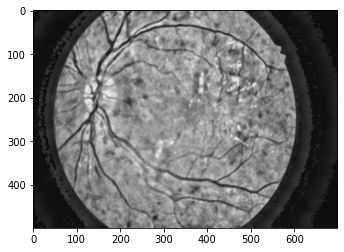

In [ ]:
org_image =  cv2.imread("/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_002.jpg") # read all the images in the folder

org_image = cv2.resize(org_image, (z,y), interpolation=cv2.INTER_LINEAR)

h, w, c = org_image.shape
if (h < y) or (w < z):
  print(org_image.shape)
org_image_gray = cv2.cvtColor(org_image, cv2.COLOR_BGR2GRAY)
cl1 = clahe.apply(org_image_gray)

#ret,thresh1 = cv2.threshold(cl1,60,180,cv2.THRESH_TOZERO)
median = cv2.medianBlur(cl1,5)


final_image = cv2.cvtColor(median, cv2.COLOR_BGR2RGB)  


plt.imshow(final_image)

In [ ]:
final_image1 = expand_dims(final_image, 0)
print(model_final.predict(final_image1))

[[0.5087473]]


In [ ]:
explainer = lime.lime_image.LimeImageExplainer()
 
explanation = explainer.explain_instance(
    image=final_image,
    classifier_fn=model_final.predict,    
    top_labels = 1,
    hide_color=0,    
    num_samples=1000)

In [ ]:
from skimage.segmentation import mark_boundaries
masked_image, boundaries = explanation.get_image_and_mask(
    explanation.top_labels[0], 
    positive_only=True, 
    num_features=1, 
    hide_rest=True)
#plt.imshow(masked_image/ 2 + 0.5)
plt.imshow(mark_boundaries(masked_image/ 2 + 0.5, boundaries))

In [ ]:
from skimage.segmentation import mark_boundaries
masked_image, boundaries = explanation.get_image_and_mask(
    label=1, 
    positive_only=True, 
    num_features=6, 
    hide_rest=False)
 
plt.imshow(mark_boundaries(masked_image / 2 + 0.5, boundaries),cmap='bone')